n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |      200 |  0.000000E+00 |  4.199255E+05 |  6.804340E+08 |  6.804342E+08
     2 |      400 |  0.000000E+00 |  1.889479E+05 |  6.804341E+08 |  6.804342E+08
     3 |      600 |  0.000000E+00 |  6.797453E+04 |  6.804340E+08 |  6.804342E+08
     4 |      800 |  0.000000E+00 |  2.167545E+04 |  6.804339E+08 |  6.804342E+08
     5 |     1000 |  0.000000E+00 |  8.343427E+03 |  6.804339E+08 |  6.804342E+08
     6 |     1200 |  0.000000E+00 |  2.818923E+03 |  6.804339E+08 |  6.804342E+08
     7 |     1400 |  0.000000E+00 |  2.347148E+02 |  6.804338E+08 |  6.804342E+08
     8 |     1600 |  0.000000E+00 |  0.000000E+00 |  6.804337E+08 |  6.804330E+08
     9 |     1800 |  0.000000E+00 |  0.000000E+00 |  6.804336E+08 |  6.804330E+08
    10 |     2000 |  0.000000E+00 |  0.000000E+00 |  6.804334E+08 |  6.804331E+08
    11 |     2200 |  0.000000E+00 |  0.000000E+00 |  6.804332E+08 |  6.804330E+08
    12 |     240

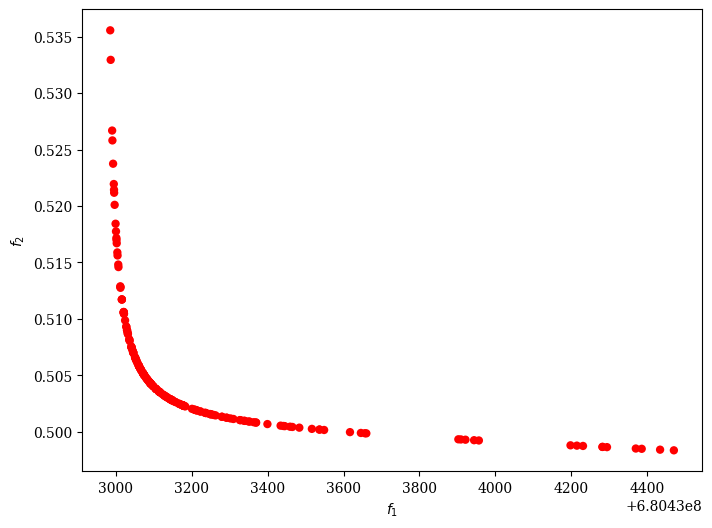

In [12]:
# !pip install pymoo
import numpy as np
from pymoo.core.problem import ElementwiseProblem
import pandas as pd
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.core.variable import Real, Integer
# from pymoo.termination.default import DefaultMultiObjectiveTermination

class MyProblem(ElementwiseProblem):
    def __init__(self, I_, J_, C_, K_, D_, N_, L__j, L__c, d__ij, d__jc, d__ck, d__cd, d__ji, d__cj, d__kc, d__dc, C__ni, a__j, a__c, a__d, a__k, theta_, beta_, gamma_, Lambda_, P__j, Pbar__j, PCE__j, PCEbar__j, TCM_, TCP_, TCEM_, TCEP_, IN__k, z__k, kappa__k, E__j, ECN__j, baseline_, M_):
        self.I = I_
        self.J = J_
        self.C = C_
        self.K = K_
        self.D = D_
        self.N = N_
        self.L_j = L__j
        self.L_c = L__c
        self.d_ij = d__ij
        self.d_jc = d__jc
        self.d_ck = d__ck
        self.d_cd = d__cd
        self.d_ji = d__ji
        self.d_cj = d__cj
        self.d_kc = d__kc
        self.d_dc = d__dc
        self.C_ni = C__ni
        self.a_j = a__j
        self.a_c = a__c
        self.a_d = a__d
        self.a_k = a__k
        self.theta = theta_
        self.beta = beta_
        self.gamma = gamma_
        self.Lambda = Lambda_
        self.P_j = P__j
        self.Pbar_j = Pbar__j
        self.PCE_j = PCE__j
        self.PCEbar_j = PCEbar__j
        self.TCM = TCM_
        self.TCP = TCP_
        self.TCEM = TCEM_
        self.TCEP = TCEP_
        self.IN_k = IN__k
        self.z_k = z__k
        self.kappa_k = kappa__k
        self.E_j = E__j
        self.ECN_j = ECN__j
        self.baseline = baseline_
        self.M = M_
        J, C, K, N, I, M = self.J, self.C, self.K, self.N, self.I, self.M
        n_obj = 2
        n_ieq_constr = 4*J + C
        n_eq_constr = J + 3*C + K
        Vars = {
            "y": Integer(bounds=(0, 100)),
            "z": Integer(bounds=(0, 1)),
            "w": Real(bounds=(0, 100)),
            "x": Real(bounds=(0, 1))
        }
        super().__init__(vars=Vars,
                         n_obj=n_obj,
                         n_ieq_constr=n_ieq_constr,
                         n_eq_constr=n_eq_constr)

    def _evaluate(self, X, out, *args, **kwargs):
        J, C, K, N, I = self.J, self.C, self.K, self.N, self.I
        x = []
        for i in range(N*I):
            xi = X["x"]
            x.append(xi)
        y = []
        for i in range(K*C+K+C*J+C*D+N*I*J+J*C+C*K+J+C+J):
            yi = X["y"]
            y.append(yi)
        z = []
        for i in range(J+C+J):
            zi = X["z"]
            z.append(zi)
        w = []
        for i in range(K+J+1+J):
            wi = X["w"]
            w.append(wi)

        # Decision Variables

        Pr_k = np.array(w[:K]).reshape(K, 1)
        IB_j = np.array(w[K:K+J]).reshape(J, 1)
        PF = np.array(w[K+J:K+J+1])
        MS_j = np.array(w[K+J+1:K+J+1+J]).reshape(J, 1)


        CRM_ni = np.array(x[:N*I]).reshape(N, I)


        R_kc = np.array(y[:K*C]).reshape(K, C)
        S_cj = np.array(y[K*C:K*C+C*J]).reshape(C, J)
        S_cd = np.array(y[K*C+C*J:K*C+C*J+C*D]).reshape(C, D)
        Q_nij = np.array(y[K*C+C*J+C*D:K*C+C*J+C*D+N*I*J]).reshape(N, I, J)
        Q_jc = np.array(y[K*C+C*J+C*D+N*I*J:K*C+C*J+C*D+N*I*J+J*C]).reshape(J, C)
        Q_ck = np.array(y[K*C+C*J+C*D+N*I*J+J*C:K*C+C*J+C*D+N*I*J+J*C+C*K]).reshape(C, K)


        X_j = np.array(z[:J]).reshape(J, 1)
        X_c = np.array(z[J:J+C]).reshape(C, 1)
        Y_j = np.array(z[J+C:J+C+J]).reshape(J, 1)

        # Equations
        carbon = (sum(d_ij[i, j] * Q_nij[n, i, j] * TCEM for n in range(N) for i in range(I) for j in range(J)) +
        sum(Q_jc[j, c] * (1 - Y_j[j] * self.ECN_j[j]) * self.PCE_j[j] for j in range(J) for c in range(C)) +
        sum(S_cj[c, j] * (1 - Y_j[j] * self.ECN_j[j]) * PCEbar_j[j] for j in range(J) for c in range(C)) +
        sum(Q_jc[j, c] * self.d_jc[j, c] * self.TCEP for j in range(J) for c in range(C)) +
        sum(Q_ck[c, k] * self.d_ck[c, k] * self.TCEP for c in range(C) for k in range(K)) +
        sum(R_kc[k, c] * self.d_kc[k, c] * self.TCEP for k in range(K) for c in range(C)) +
        sum(S_cj[c, j] * self.d_cj[c, j] * self.TCEP for c in range(C) for j in range(J)) +
        sum(S_cd[c, d] * self.d_cd[c, d] * self.TCEM for c in range(C) for d in range(D)))
        CP = (carbon-self.baseline)/self.baseline
        CT = (np.exp(CP) - 1) if CP >= 0 else 0
        CCR = 0 if CP >= 0 else CP / (CP - 1)
        CRM = (sum(CRM_ni[n, i] * Q_nij[n, i, j] for n in range(N) for i in range(I) for j in range(J)) / sum(Q_nij[n, i, j] for n in range(N) for i in range(I) for j in range(J))) if sum(Q_nij[n, i, j] for n in range(N) for i in range(I) for j in range(J)) != 0 else 0
        B_k = np.round(8 * CCR * self.kappa_k * (self.a_k - (self.beta * PF) + (self.theta * Pr_k)))
        S_k = np.array([((sum(Q_ck[c, k] for c in range(C))) - B_k[k]) for k in range(K)])
        S = 0.5 * CCR
        EIC_j = 0.00002 * IB_j
        CI = (0.5 * (1 - CRM)) / (CRM + 1)
        LI_j = 1 / (27.78 * MS_j)
        Y_k = (1 + np.sign(S_k)) / 2
        SUM_X_j = sum(X_j[j] for j in range(J)) if sum(X_j[j] for j in range(J))!=0 else 1

        # Objective functions
        f1 = -1 * (sum(PF * (((1 - Y_k[k]) * Q_ck[c, k]) + (Y_k[k] * B_k[k])) for k in range(K) for c in range(C))
                   - (sum(Q_nij[n, i, j] * (1 - S) * self.C_ni[n, i] * CRM for n in range(N) for i in range(I) for j in range(J))
                      + sum(self.d_ij[i, j] * Q_nij[n, i, j] * self.TCM for j in range(J) for n in range(N) for i in range(I))
                      + sum(self.d_cj[c, j] * S_cj[c, j] * self.TCP for j in range(J) for c in range(C))
                      + sum(Y_j[j] * self.E_j[j] + X_j[j] * self.L_j[j] for j in range(J))
                      + sum(X_j[j] * IB_j[j] for j in range(J))
                      + sum(Q_jc[j, c] * self.P_j[j] * MS_j[j] for j in range(J) for c in range(C))
                      + sum(S_cj[c, j] * self.Pbar_j[j] * MS_j[j] for j in range(J) for c in range(C))
                      + sum(self.d_jc[j, c] * Q_jc[j, c] * self.TCP for j in range(J) for c in range(C))
                      + sum(S_cj[c, j] * self.d_cj[c, j] * self.TCP for j in range(J) for c in range(C))
                      + sum(X_c[c] * self.L_c[c] for c in range(C))
                      + sum(self.d_ck[c, k] * Q_ck[c, k] * self.TCP for c in range(C) for k in range(K))
                      + sum(self.d_kc[k, c] * R_kc[k, c] * self.TCP for c in range(C) for k in range(K))
                      + sum(S_cd[c, d] * self.d_cd[c, d] * self.TCP for c in range(C) for d in range(D))
                      + sum(Y_k[k] * self.IN_k[k] * S_k[k] - (1 - Y_k[k]) * self.z_k[k] * S_k[k] for k in range(K)))
                   + sum(R_kc[k, c] * Pr_k[k] for c in range(C) for k in range(K)) - CT)

        f2 = (sum(X_j[j] * (LI_j[j] - EIC_j[j]) for j in range(J)) / SUM_X_j) + CI
        # Generating Constraints: "C:\Users\Asus\Desktop\Dr. Ziari\generating constraints.py"
        # Equality Constraints:
        h1 = (sum(Q_nij[n, i, 0] for n in range(N) for i in range(I))) + (sum(S_cj[c, 0] for c in range(C))) - (sum(Q_jc[0, c] for c in range(C)))
        h2 = (sum(Q_nij[n, i, 1] for n in range(N) for i in range(I))) + (sum(S_cj[c, 1] for c in range(C))) - (sum(Q_jc[1, c] for c in range(C)))
        h3 = (sum(Q_nij[n, i, 2] for n in range(N) for i in range(I))) + (sum(S_cj[c, 2] for c in range(C))) - (sum(Q_jc[2, c] for c in range(C)))
        h4 = (sum(Q_nij[n, i, 3] for n in range(N) for i in range(I))) + (sum(S_cj[c, 3] for c in range(C))) - (sum(Q_jc[3, c] for c in range(C)))
        h5 = (sum(Q_nij[n, i, 4] for n in range(N) for i in range(I))) + (sum(S_cj[c, 4] for c in range(C))) - (sum(Q_jc[4, c] for c in range(C)))
        h6 = (sum(Q_nij[n, i, 5] for n in range(N) for i in range(I))) + (sum(S_cj[c, 5] for c in range(C))) - (sum(Q_jc[5, c] for c in range(C)))
        h7 = (sum(Q_nij[n, i, 6] for n in range(N) for i in range(I))) + (sum(S_cj[c, 6] for c in range(C))) - (sum(Q_jc[6, c] for c in range(C)))
        h8 = (sum(Q_nij[n, i, 7] for n in range(N) for i in range(I))) + (sum(S_cj[c, 7] for c in range(C))) - (sum(Q_jc[7, c] for c in range(C)))
        h9 = (sum(Q_nij[n, i, 8] for n in range(N) for i in range(I))) + (sum(S_cj[c, 8] for c in range(C))) - (sum(Q_jc[8, c] for c in range(C)))
        h10 = (sum(Q_nij[n, i, 9] for n in range(N) for i in range(I))) + (sum(S_cj[c, 9] for c in range(C))) - (sum(Q_jc[9, c] for c in range(C)))
        h11 = (sum(Q_nij[n, i, 10] for n in range(N) for i in range(I))) + (sum(S_cj[c, 10] for c in range(C))) - (sum(Q_jc[10, c] for c in range(C)))
        h12 = (sum(Q_nij[n, i, 11] for n in range(N) for i in range(I))) + (sum(S_cj[c, 11] for c in range(C))) - (sum(Q_jc[11, c] for c in range(C)))
        h13 = (sum(Q_nij[n, i, 12] for n in range(N) for i in range(I))) + (sum(S_cj[c, 12] for c in range(C))) - (sum(Q_jc[12, c] for c in range(C)))
        h14 = (sum(Q_nij[n, i, 13] for n in range(N) for i in range(I))) + (sum(S_cj[c, 13] for c in range(C))) - (sum(Q_jc[13, c] for c in range(C)))
        h15 = (sum(Q_nij[n, i, 14] for n in range(N) for i in range(I))) + (sum(S_cj[c, 14] for c in range(C))) - (sum(Q_jc[14, c] for c in range(C)))
        h16 = sum(Q_jc[j, 0] for j in range(J)) - sum(Q_ck[0, k] for k in range(K))
        h17 = sum(Q_jc[j, 1] for j in range(J)) - sum(Q_ck[1, k] for k in range(K))
        h18 = sum(Q_jc[j, 2] for j in range(J)) - sum(Q_ck[2, k] for k in range(K))
        h19 = sum(Q_jc[j, 3] for j in range(J)) - sum(Q_ck[3, k] for k in range(K))
        h20 = sum(Q_jc[j, 4] for j in range(J)) - sum(Q_ck[4, k] for k in range(K))
        h21 = sum(Q_jc[j, 5] for j in range(J)) - sum(Q_ck[5, k] for k in range(K))
        h22 = sum(Q_jc[j, 6] for j in range(J)) - sum(Q_ck[6, k] for k in range(K))
        h23 = sum(Q_jc[j, 7] for j in range(J)) - sum(Q_ck[7, k] for k in range(K))
        h24 = sum(Q_jc[j, 8] for j in range(J)) - sum(Q_ck[8, k] for k in range(K))
        h25 = sum(Q_jc[j, 9] for j in range(J)) - sum(Q_ck[9, k] for k in range(K))
        h26 = sum(Q_jc[j, 10] for j in range(J)) - sum(Q_ck[10, k] for k in range(K))
        h27 = sum(Q_jc[j, 11] for j in range(J)) - sum(Q_ck[11, k] for k in range(K))
        h28 = sum(Q_jc[j, 12] for j in range(J)) - sum(Q_ck[12, k] for k in range(K))
        h29 = sum(Q_jc[j, 13] for j in range(J)) - sum(Q_ck[13, k] for k in range(K))
        h30 = sum(Q_jc[j, 14] for j in range(J)) - sum(Q_ck[14, k] for k in range(K))
        h31 = sum(Q_jc[j, 15] for j in range(J)) - sum(Q_ck[15, k] for k in range(K))
        h32 = sum(Q_jc[j, 16] for j in range(J)) - sum(Q_ck[16, k] for k in range(K))
        h33 = sum(Q_jc[j, 17] for j in range(J)) - sum(Q_ck[17, k] for k in range(K))
        h34 = sum(Q_jc[j, 18] for j in range(J)) - sum(Q_ck[18, k] for k in range(K))
        h35 = sum(Q_jc[j, 19] for j in range(J)) - sum(Q_ck[19, k] for k in range(K))
        h36 = sum(Q_jc[j, 20] for j in range(J)) - sum(Q_ck[20, k] for k in range(K))
        h37 = sum(Q_jc[j, 21] for j in range(J)) - sum(Q_ck[21, k] for k in range(K))
        h38 = sum(Q_jc[j, 22] for j in range(J)) - sum(Q_ck[22, k] for k in range(K))
        h39 = sum(Q_jc[j, 23] for j in range(J)) - sum(Q_ck[23, k] for k in range(K))
        h40 = sum(Q_jc[j, 24] for j in range(J)) - sum(Q_ck[24, k] for k in range(K))
        h41 = sum(Q_jc[j, 25] for j in range(J)) - sum(Q_ck[25, k] for k in range(K))
        h42 = sum(Q_jc[j, 26] for j in range(J)) - sum(Q_ck[26, k] for k in range(K))
        h43 = sum(Q_jc[j, 27] for j in range(J)) - sum(Q_ck[27, k] for k in range(K))
        h44 = sum(Q_jc[j, 28] for j in range(J)) - sum(Q_ck[28, k] for k in range(K))
        h45 = sum(Q_jc[j, 29] for j in range(J)) - sum(Q_ck[29, k] for k in range(K))
        h46 = sum(Q_jc[j, 30] for j in range(J)) - sum(Q_ck[30, k] for k in range(K))
        h47 = sum(Q_jc[j, 31] for j in range(J)) - sum(Q_ck[31, k] for k in range(K))
        h48 = sum(Q_jc[j, 32] for j in range(J)) - sum(Q_ck[32, k] for k in range(K))
        h49 = sum(Q_jc[j, 33] for j in range(J)) - sum(Q_ck[33, k] for k in range(K))
        h50 = sum(Q_jc[j, 34] for j in range(J)) - sum(Q_ck[34, k] for k in range(K))
        h51 = sum(Q_jc[j, 35] for j in range(J)) - sum(Q_ck[35, k] for k in range(K))
        h52 = sum(Q_jc[j, 36] for j in range(J)) - sum(Q_ck[36, k] for k in range(K))
        h53 = sum(Q_jc[j, 37] for j in range(J)) - sum(Q_ck[37, k] for k in range(K))
        h54 = sum(Q_jc[j, 38] for j in range(J)) - sum(Q_ck[38, k] for k in range(K))
        h55 = sum(Q_jc[j, 39] for j in range(J)) - sum(Q_ck[39, k] for k in range(K))
        h56 = sum(Q_jc[j, 40] for j in range(J)) - sum(Q_ck[40, k] for k in range(K))
        h57 = sum(Q_jc[j, 41] for j in range(J)) - sum(Q_ck[41, k] for k in range(K))
        h58 = sum(Q_jc[j, 42] for j in range(J)) - sum(Q_ck[42, k] for k in range(K))
        h59 = sum(Q_jc[j, 43] for j in range(J)) - sum(Q_ck[43, k] for k in range(K))
        h60 = sum(Q_jc[j, 44] for j in range(J)) - sum(Q_ck[44, k] for k in range(K))
        h61 = sum(R_kc[0, c] for c in range(C)) - self.Lambda * float(B_k[0])
        h62 = sum(R_kc[1, c] for c in range(C)) - self.Lambda * float(B_k[1])
        h63 = sum(R_kc[2, c] for c in range(C)) - self.Lambda * float(B_k[2])
        h64 = sum(R_kc[3, c] for c in range(C)) - self.Lambda * float(B_k[3])
        h65 = sum(R_kc[4, c] for c in range(C)) - self.Lambda * float(B_k[4])
        h66 = sum(R_kc[5, c] for c in range(C)) - self.Lambda * float(B_k[5])
        h67 = sum(R_kc[6, c] for c in range(C)) - self.Lambda * float(B_k[6])
        h68 = sum(R_kc[7, c] for c in range(C)) - self.Lambda * float(B_k[7])
        h69 = sum(R_kc[8, c] for c in range(C)) - self.Lambda * float(B_k[8])
        h70 = sum(R_kc[9, c] for c in range(C)) - self.Lambda * float(B_k[9])
        h71 = sum(R_kc[10, c] for c in range(C)) - self.Lambda * float(B_k[10])
        h72 = sum(R_kc[11, c] for c in range(C)) - self.Lambda * float(B_k[11])
        h73 = sum(R_kc[12, c] for c in range(C)) - self.Lambda * float(B_k[12])
        h74 = sum(R_kc[13, c] for c in range(C)) - self.Lambda * float(B_k[13])
        h75 = sum(R_kc[14, c] for c in range(C)) - self.Lambda * float(B_k[14])
        h76 = sum(R_kc[15, c] for c in range(C)) - self.Lambda * float(B_k[15])
        h77 = sum(R_kc[16, c] for c in range(C)) - self.Lambda * float(B_k[16])
        h78 = sum(R_kc[17, c] for c in range(C)) - self.Lambda * float(B_k[17])
        h79 = sum(R_kc[18, c] for c in range(C)) - self.Lambda * float(B_k[18])
        h80 = sum(R_kc[19, c] for c in range(C)) - self.Lambda * float(B_k[19])
        h81 = sum(R_kc[20, c] for c in range(C)) - self.Lambda * float(B_k[20])
        h82 = sum(R_kc[21, c] for c in range(C)) - self.Lambda * float(B_k[21])
        h83 = sum(R_kc[22, c] for c in range(C)) - self.Lambda * float(B_k[22])
        h84 = sum(R_kc[23, c] for c in range(C)) - self.Lambda * float(B_k[23])
        h85 = sum(R_kc[24, c] for c in range(C)) - self.Lambda * float(B_k[24])
        h86 = sum(R_kc[25, c] for c in range(C)) - self.Lambda * float(B_k[25])
        h87 = sum(R_kc[26, c] for c in range(C)) - self.Lambda * float(B_k[26])
        h88 = sum(R_kc[27, c] for c in range(C)) - self.Lambda * float(B_k[27])
        h89 = sum(R_kc[28, c] for c in range(C)) - self.Lambda * float(B_k[28])
        h90 = sum(R_kc[29, c] for c in range(C)) - self.Lambda * float(B_k[29])
        h91 = sum(R_kc[30, c] for c in range(C)) - self.Lambda * float(B_k[30])
        h92 = sum(R_kc[31, c] for c in range(C)) - self.Lambda * float(B_k[31])
        h93 = sum(R_kc[32, c] for c in range(C)) - self.Lambda * float(B_k[32])
        h94 = sum(R_kc[33, c] for c in range(C)) - self.Lambda * float(B_k[33])
        h95 = sum(R_kc[34, c] for c in range(C)) - self.Lambda * float(B_k[34])
        h96 = sum(R_kc[35, c] for c in range(C)) - self.Lambda * float(B_k[35])
        h97 = sum(R_kc[36, c] for c in range(C)) - self.Lambda * float(B_k[36])
        h98 = sum(R_kc[37, c] for c in range(C)) - self.Lambda * float(B_k[37])
        h99 = sum(R_kc[38, c] for c in range(C)) - self.Lambda * float(B_k[38])
        h100 = sum(R_kc[39, c] for c in range(C)) - self.Lambda * float(B_k[39])
        h101 = sum(R_kc[40, c] for c in range(C)) - self.Lambda * float(B_k[40])
        h102 = sum(R_kc[41, c] for c in range(C)) - self.Lambda * float(B_k[41])
        h103 = sum(R_kc[42, c] for c in range(C)) - self.Lambda * float(B_k[42])
        h104 = sum(R_kc[43, c] for c in range(C)) - self.Lambda * float(B_k[43])
        h105 = sum(R_kc[44, c] for c in range(C)) - self.Lambda * float(B_k[44])
        h106 = sum(R_kc[45, c] for c in range(C)) - self.Lambda * float(B_k[45])
        h107 = sum(R_kc[46, c] for c in range(C)) - self.Lambda * float(B_k[46])
        h108 = sum(R_kc[47, c] for c in range(C)) - self.Lambda * float(B_k[47])
        h109 = sum(R_kc[48, c] for c in range(C)) - self.Lambda * float(B_k[48])
        h110 = sum(R_kc[49, c] for c in range(C)) - self.Lambda * float(B_k[49])
        h111 = sum(S_cj[0, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 0] for k in range(K))
        h112 = sum(S_cj[1, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 1] for k in range(K))
        h113 = sum(S_cj[2, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 2] for k in range(K))
        h114 = sum(S_cj[3, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 3] for k in range(K))
        h115 = sum(S_cj[4, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 4] for k in range(K))
        h116 = sum(S_cj[5, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 5] for k in range(K))
        h117 = sum(S_cj[6, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 6] for k in range(K))
        h118 = sum(S_cj[7, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 7] for k in range(K))
        h119 = sum(S_cj[8, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 8] for k in range(K))
        h120 = sum(S_cj[9, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 9] for k in range(K))
        h121 = sum(S_cj[10, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 10] for k in range(K))
        h122 = sum(S_cj[11, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 11] for k in range(K))
        h123 = sum(S_cj[12, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 12] for k in range(K))
        h124 = sum(S_cj[13, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 13] for k in range(K))
        h125 = sum(S_cj[14, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 14] for k in range(K))
        h126 = sum(S_cj[15, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 15] for k in range(K))
        h127 = sum(S_cj[16, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 16] for k in range(K))
        h128 = sum(S_cj[17, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 17] for k in range(K))
        h129 = sum(S_cj[18, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 18] for k in range(K))
        h130 = sum(S_cj[19, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 19] for k in range(K))
        h131 = sum(S_cj[20, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 20] for k in range(K))
        h132 = sum(S_cj[21, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 21] for k in range(K))
        h133 = sum(S_cj[22, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 22] for k in range(K))
        h134 = sum(S_cj[23, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 23] for k in range(K))
        h135 = sum(S_cj[24, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 24] for k in range(K))
        h136 = sum(S_cj[25, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 25] for k in range(K))
        h137 = sum(S_cj[26, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 26] for k in range(K))
        h138 = sum(S_cj[27, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 27] for k in range(K))
        h139 = sum(S_cj[28, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 28] for k in range(K))
        h140 = sum(S_cj[29, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 29] for k in range(K))
        h141 = sum(S_cj[30, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 30] for k in range(K))
        h142 = sum(S_cj[31, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 31] for k in range(K))
        h143 = sum(S_cj[32, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 32] for k in range(K))
        h144 = sum(S_cj[33, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 33] for k in range(K))
        h145 = sum(S_cj[34, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 34] for k in range(K))
        h146 = sum(S_cj[35, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 35] for k in range(K))
        h147 = sum(S_cj[36, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 36] for k in range(K))
        h148 = sum(S_cj[37, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 37] for k in range(K))
        h149 = sum(S_cj[38, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 38] for k in range(K))
        h150 = sum(S_cj[39, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 39] for k in range(K))
        h151 = sum(S_cj[40, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 40] for k in range(K))
        h152 = sum(S_cj[41, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 41] for k in range(K))
        h153 = sum(S_cj[42, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 42] for k in range(K))
        h154 = sum(S_cj[43, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 43] for k in range(K))
        h155 = sum(S_cj[44, j] for j in range(J)) - (1 - self.gamma) * sum(R_kc[k, 44] for k in range(K))
        h156 = sum(S_cd[0, d] for d in range(D)) - self.gamma * sum(R_kc[k, 0] for k in range(K))
        h157 = sum(S_cd[1, d] for d in range(D)) - self.gamma * sum(R_kc[k, 1] for k in range(K))
        h158 = sum(S_cd[2, d] for d in range(D)) - self.gamma * sum(R_kc[k, 2] for k in range(K))
        h159 = sum(S_cd[3, d] for d in range(D)) - self.gamma * sum(R_kc[k, 3] for k in range(K))
        h160 = sum(S_cd[4, d] for d in range(D)) - self.gamma * sum(R_kc[k, 4] for k in range(K))
        h161 = sum(S_cd[5, d] for d in range(D)) - self.gamma * sum(R_kc[k, 5] for k in range(K))
        h162 = sum(S_cd[6, d] for d in range(D)) - self.gamma * sum(R_kc[k, 6] for k in range(K))
        h163 = sum(S_cd[7, d] for d in range(D)) - self.gamma * sum(R_kc[k, 7] for k in range(K))
        h164 = sum(S_cd[8, d] for d in range(D)) - self.gamma * sum(R_kc[k, 8] for k in range(K))
        h165 = sum(S_cd[9, d] for d in range(D)) - self.gamma * sum(R_kc[k, 9] for k in range(K))
        h166 = sum(S_cd[10, d] for d in range(D)) - self.gamma * sum(R_kc[k, 10] for k in range(K))
        h167 = sum(S_cd[11, d] for d in range(D)) - self.gamma * sum(R_kc[k, 11] for k in range(K))
        h168 = sum(S_cd[12, d] for d in range(D)) - self.gamma * sum(R_kc[k, 12] for k in range(K))
        h169 = sum(S_cd[13, d] for d in range(D)) - self.gamma * sum(R_kc[k, 13] for k in range(K))
        h170 = sum(S_cd[14, d] for d in range(D)) - self.gamma * sum(R_kc[k, 14] for k in range(K))
        h171 = sum(S_cd[15, d] for d in range(D)) - self.gamma * sum(R_kc[k, 15] for k in range(K))
        h172 = sum(S_cd[16, d] for d in range(D)) - self.gamma * sum(R_kc[k, 16] for k in range(K))
        h173 = sum(S_cd[17, d] for d in range(D)) - self.gamma * sum(R_kc[k, 17] for k in range(K))
        h174 = sum(S_cd[18, d] for d in range(D)) - self.gamma * sum(R_kc[k, 18] for k in range(K))
        h175 = sum(S_cd[19, d] for d in range(D)) - self.gamma * sum(R_kc[k, 19] for k in range(K))
        h176 = sum(S_cd[20, d] for d in range(D)) - self.gamma * sum(R_kc[k, 20] for k in range(K))
        h177 = sum(S_cd[21, d] for d in range(D)) - self.gamma * sum(R_kc[k, 21] for k in range(K))
        h178 = sum(S_cd[22, d] for d in range(D)) - self.gamma * sum(R_kc[k, 22] for k in range(K))
        h179 = sum(S_cd[23, d] for d in range(D)) - self.gamma * sum(R_kc[k, 23] for k in range(K))
        h180 = sum(S_cd[24, d] for d in range(D)) - self.gamma * sum(R_kc[k, 24] for k in range(K))
        h181 = sum(S_cd[25, d] for d in range(D)) - self.gamma * sum(R_kc[k, 25] for k in range(K))
        h182 = sum(S_cd[26, d] for d in range(D)) - self.gamma * sum(R_kc[k, 26] for k in range(K))
        h183 = sum(S_cd[27, d] for d in range(D)) - self.gamma * sum(R_kc[k, 27] for k in range(K))
        h184 = sum(S_cd[28, d] for d in range(D)) - self.gamma * sum(R_kc[k, 28] for k in range(K))
        h185 = sum(S_cd[29, d] for d in range(D)) - self.gamma * sum(R_kc[k, 29] for k in range(K))
        h186 = sum(S_cd[30, d] for d in range(D)) - self.gamma * sum(R_kc[k, 30] for k in range(K))
        h187 = sum(S_cd[31, d] for d in range(D)) - self.gamma * sum(R_kc[k, 31] for k in range(K))
        h188 = sum(S_cd[32, d] for d in range(D)) - self.gamma * sum(R_kc[k, 32] for k in range(K))
        h189 = sum(S_cd[33, d] for d in range(D)) - self.gamma * sum(R_kc[k, 33] for k in range(K))
        h190 = sum(S_cd[34, d] for d in range(D)) - self.gamma * sum(R_kc[k, 34] for k in range(K))
        h191 = sum(S_cd[35, d] for d in range(D)) - self.gamma * sum(R_kc[k, 35] for k in range(K))
        h192 = sum(S_cd[36, d] for d in range(D)) - self.gamma * sum(R_kc[k, 36] for k in range(K))
        h193 = sum(S_cd[37, d] for d in range(D)) - self.gamma * sum(R_kc[k, 37] for k in range(K))
        h194 = sum(S_cd[38, d] for d in range(D)) - self.gamma * sum(R_kc[k, 38] for k in range(K))
        h195 = sum(S_cd[39, d] for d in range(D)) - self.gamma * sum(R_kc[k, 39] for k in range(K))
        h196 = sum(S_cd[40, d] for d in range(D)) - self.gamma * sum(R_kc[k, 40] for k in range(K))
        h197 = sum(S_cd[41, d] for d in range(D)) - self.gamma * sum(R_kc[k, 41] for k in range(K))
        h198 = sum(S_cd[42, d] for d in range(D)) - self.gamma * sum(R_kc[k, 42] for k in range(K))
        h199 = sum(S_cd[43, d] for d in range(D)) - self.gamma * sum(R_kc[k, 43] for k in range(K))
        h200 = sum(S_cd[44, d] for d in range(D)) - self.gamma * sum(R_kc[k, 44] for k in range(K))

        # Inequality Constraints:
        g1 = (sum(Q_jc[0, c] for c in range(C))) - (self.a_j[0] * X_j[0])
        g2 = (sum(Q_jc[1, c] for c in range(C))) - (self.a_j[1] * X_j[1])
        g3 = (sum(Q_jc[2, c] for c in range(C))) - (self.a_j[2] * X_j[2])
        g4 = (sum(Q_jc[3, c] for c in range(C))) - (self.a_j[3] * X_j[3])
        g5 = (sum(Q_jc[4, c] for c in range(C))) - (self.a_j[4] * X_j[4])
        g6 = (sum(Q_jc[5, c] for c in range(C))) - (self.a_j[5] * X_j[5])
        g7 = (sum(Q_jc[6, c] for c in range(C))) - (self.a_j[6] * X_j[6])
        g8 = (sum(Q_jc[7, c] for c in range(C))) - (self.a_j[7] * X_j[7])
        g9 = (sum(Q_jc[8, c] for c in range(C))) - (self.a_j[8] * X_j[8])
        g10 = (sum(Q_jc[9, c] for c in range(C))) - (self.a_j[9] * X_j[9])
        g11 = (sum(Q_jc[10, c] for c in range(C))) - (self.a_j[10] * X_j[10])
        g12 = (sum(Q_jc[11, c] for c in range(C))) - (self.a_j[11] * X_j[11])
        g13 = (sum(Q_jc[12, c] for c in range(C))) - (self.a_j[12] * X_j[12])
        g14 = (sum(Q_jc[13, c] for c in range(C))) - (self.a_j[13] * X_j[13])
        g15 = (sum(Q_jc[14, c] for c in range(C))) - (self.a_j[14] * X_j[14])
        g16 = sum(R_kc[k, 0] for k in range(K)) + sum(Q_jc[j, 0] for j in range(J)) - self.a_c[0] * X_c[0]
        g17 = sum(R_kc[k, 1] for k in range(K)) + sum(Q_jc[j, 1] for j in range(J)) - self.a_c[1] * X_c[1]
        g18 = sum(R_kc[k, 2] for k in range(K)) + sum(Q_jc[j, 2] for j in range(J)) - self.a_c[2] * X_c[2]
        g19 = sum(R_kc[k, 3] for k in range(K)) + sum(Q_jc[j, 3] for j in range(J)) - self.a_c[3] * X_c[3]
        g20 = sum(R_kc[k, 4] for k in range(K)) + sum(Q_jc[j, 4] for j in range(J)) - self.a_c[4] * X_c[4]
        g21 = sum(R_kc[k, 5] for k in range(K)) + sum(Q_jc[j, 5] for j in range(J)) - self.a_c[5] * X_c[5]
        g22 = sum(R_kc[k, 6] for k in range(K)) + sum(Q_jc[j, 6] for j in range(J)) - self.a_c[6] * X_c[6]
        g23 = sum(R_kc[k, 7] for k in range(K)) + sum(Q_jc[j, 7] for j in range(J)) - self.a_c[7] * X_c[7]
        g24 = sum(R_kc[k, 8] for k in range(K)) + sum(Q_jc[j, 8] for j in range(J)) - self.a_c[8] * X_c[8]
        g25 = sum(R_kc[k, 9] for k in range(K)) + sum(Q_jc[j, 9] for j in range(J)) - self.a_c[9] * X_c[9]
        g26 = sum(R_kc[k, 10] for k in range(K)) + sum(Q_jc[j, 10] for j in range(J)) - self.a_c[10] * X_c[10]
        g27 = sum(R_kc[k, 11] for k in range(K)) + sum(Q_jc[j, 11] for j in range(J)) - self.a_c[11] * X_c[11]
        g28 = sum(R_kc[k, 12] for k in range(K)) + sum(Q_jc[j, 12] for j in range(J)) - self.a_c[12] * X_c[12]
        g29 = sum(R_kc[k, 13] for k in range(K)) + sum(Q_jc[j, 13] for j in range(J)) - self.a_c[13] * X_c[13]
        g30 = sum(R_kc[k, 14] for k in range(K)) + sum(Q_jc[j, 14] for j in range(J)) - self.a_c[14] * X_c[14]
        g31 = sum(R_kc[k, 15] for k in range(K)) + sum(Q_jc[j, 15] for j in range(J)) - self.a_c[15] * X_c[15]
        g32 = sum(R_kc[k, 16] for k in range(K)) + sum(Q_jc[j, 16] for j in range(J)) - self.a_c[16] * X_c[16]
        g33 = sum(R_kc[k, 17] for k in range(K)) + sum(Q_jc[j, 17] for j in range(J)) - self.a_c[17] * X_c[17]
        g34 = sum(R_kc[k, 18] for k in range(K)) + sum(Q_jc[j, 18] for j in range(J)) - self.a_c[18] * X_c[18]
        g35 = sum(R_kc[k, 19] for k in range(K)) + sum(Q_jc[j, 19] for j in range(J)) - self.a_c[19] * X_c[19]
        g36 = sum(R_kc[k, 20] for k in range(K)) + sum(Q_jc[j, 20] for j in range(J)) - self.a_c[20] * X_c[20]
        g37 = sum(R_kc[k, 21] for k in range(K)) + sum(Q_jc[j, 21] for j in range(J)) - self.a_c[21] * X_c[21]
        g38 = sum(R_kc[k, 22] for k in range(K)) + sum(Q_jc[j, 22] for j in range(J)) - self.a_c[22] * X_c[22]
        g39 = sum(R_kc[k, 23] for k in range(K)) + sum(Q_jc[j, 23] for j in range(J)) - self.a_c[23] * X_c[23]
        g40 = sum(R_kc[k, 24] for k in range(K)) + sum(Q_jc[j, 24] for j in range(J)) - self.a_c[24] * X_c[24]
        g41 = sum(R_kc[k, 25] for k in range(K)) + sum(Q_jc[j, 25] for j in range(J)) - self.a_c[25] * X_c[25]
        g42 = sum(R_kc[k, 26] for k in range(K)) + sum(Q_jc[j, 26] for j in range(J)) - self.a_c[26] * X_c[26]
        g43 = sum(R_kc[k, 27] for k in range(K)) + sum(Q_jc[j, 27] for j in range(J)) - self.a_c[27] * X_c[27]
        g44 = sum(R_kc[k, 28] for k in range(K)) + sum(Q_jc[j, 28] for j in range(J)) - self.a_c[28] * X_c[28]
        g45 = sum(R_kc[k, 29] for k in range(K)) + sum(Q_jc[j, 29] for j in range(J)) - self.a_c[29] * X_c[29]
        g46 = sum(R_kc[k, 30] for k in range(K)) + sum(Q_jc[j, 30] for j in range(J)) - self.a_c[30] * X_c[30]
        g47 = sum(R_kc[k, 31] for k in range(K)) + sum(Q_jc[j, 31] for j in range(J)) - self.a_c[31] * X_c[31]
        g48 = sum(R_kc[k, 32] for k in range(K)) + sum(Q_jc[j, 32] for j in range(J)) - self.a_c[32] * X_c[32]
        g49 = sum(R_kc[k, 33] for k in range(K)) + sum(Q_jc[j, 33] for j in range(J)) - self.a_c[33] * X_c[33]
        g50 = sum(R_kc[k, 34] for k in range(K)) + sum(Q_jc[j, 34] for j in range(J)) - self.a_c[34] * X_c[34]
        g51 = sum(R_kc[k, 35] for k in range(K)) + sum(Q_jc[j, 35] for j in range(J)) - self.a_c[35] * X_c[35]
        g52 = sum(R_kc[k, 36] for k in range(K)) + sum(Q_jc[j, 36] for j in range(J)) - self.a_c[36] * X_c[36]
        g53 = sum(R_kc[k, 37] for k in range(K)) + sum(Q_jc[j, 37] for j in range(J)) - self.a_c[37] * X_c[37]
        g54 = sum(R_kc[k, 38] for k in range(K)) + sum(Q_jc[j, 38] for j in range(J)) - self.a_c[38] * X_c[38]
        g55 = sum(R_kc[k, 39] for k in range(K)) + sum(Q_jc[j, 39] for j in range(J)) - self.a_c[39] * X_c[39]
        g56 = sum(R_kc[k, 40] for k in range(K)) + sum(Q_jc[j, 40] for j in range(J)) - self.a_c[40] * X_c[40]
        g57 = sum(R_kc[k, 41] for k in range(K)) + sum(Q_jc[j, 41] for j in range(J)) - self.a_c[41] * X_c[41]
        g58 = sum(R_kc[k, 42] for k in range(K)) + sum(Q_jc[j, 42] for j in range(J)) - self.a_c[42] * X_c[42]
        g59 = sum(R_kc[k, 43] for k in range(K)) + sum(Q_jc[j, 43] for j in range(J)) - self.a_c[43] * X_c[43]
        g60 = sum(R_kc[k, 44] for k in range(K)) + sum(Q_jc[j, 44] for j in range(J)) - self.a_c[44] * X_c[44]
        g61 = Y_j[0] - X_j[0]
        g62 = Y_j[1] - X_j[1]
        g63 = Y_j[2] - X_j[2]
        g64 = Y_j[3] - X_j[3]
        g65 = Y_j[4] - X_j[4]
        g66 = Y_j[5] - X_j[5]
        g67 = Y_j[6] - X_j[6]
        g68 = Y_j[7] - X_j[7]
        g69 = Y_j[8] - X_j[8]
        g70 = Y_j[9] - X_j[9]
        g71 = Y_j[10] - X_j[10]
        g72 = Y_j[11] - X_j[11]
        g73 = Y_j[12] - X_j[12]
        g74 = Y_j[13] - X_j[13]
        g75 = Y_j[14] - X_j[14]
        g76 = MS_j[0] - self.M * X_j[0]
        g77 = MS_j[1] - self.M * X_j[1]
        g78 = MS_j[2] - self.M * X_j[2]
        g79 = MS_j[3] - self.M * X_j[3]
        g80 = MS_j[4] - self.M * X_j[4]
        g81 = MS_j[5] - self.M * X_j[5]
        g82 = MS_j[6] - self.M * X_j[6]
        g83 = MS_j[7] - self.M * X_j[7]
        g84 = MS_j[8] - self.M * X_j[8]
        g85 = MS_j[9] - self.M * X_j[9]
        g86 = MS_j[10] - self.M * X_j[10]
        g87 = MS_j[11] - self.M * X_j[11]
        g88 = MS_j[12] - self.M * X_j[12]
        g89 = MS_j[13] - self.M * X_j[13]
        g90 = MS_j[14] - self.M * X_j[14]
        g91 = X_j[0] - MS_j[0]
        g92 = X_j[1] - MS_j[1]
        g93 = X_j[2] - MS_j[2]
        g94 = X_j[3] - MS_j[3]
        g95 = X_j[4] - MS_j[4]
        g96 = X_j[5] - MS_j[5]
        g97 = X_j[6] - MS_j[6]
        g98 = X_j[7] - MS_j[7]
        g99 = X_j[8] - MS_j[8]
        g100 = X_j[9] - MS_j[9]
        g101 = X_j[10] - MS_j[10]
        g102 = X_j[11] - MS_j[11]
        g103 = X_j[12] - MS_j[12]
        g104 = X_j[13] - MS_j[13]
        g105 = X_j[14] - MS_j[14]

        out["F"] = [f1, f2]
        out["G"] = [g1, g2, g3, g4, g5, g6, g7, g8, g9, g10, g11, g12, g13, g14, g15, g16, g17, g18, g19, g20, g21, g22, g23, g24, g25, g26, g27, g28, g29, g30, g31, g32, g33, g34, g35, g36, g37, g38, g39, g40, g41, g42, g43, g44, g45, g46, g47, g48, g49, g50, g51, g52, g53, g54, g55, g56, g57, g58, g59, g60, g61, g62, g63, g64, g65, g66, g67, g68, g69, g70, g71, g72, g73, g74, g75, g76, g77, g78, g79, g80, g81, g82, g83, g84, g85, g86, g87, g88, g89, g90, g91, g92, g93, g94, g95, g96, g97, g98, g99, g100, g101, g102, g103, g104, g105]
        out["H"] = [h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16, h17, h18, h19, h20, h21, h22, h23, h24, h25, h26, h27, h28, h29, h30, h31, h32, h33, h34, h35, h36, h37, h38, h39, h40, h41, h42, h43, h44, h45, h46, h47, h48, h49, h50, h51, h52, h53, h54, h55, h56, h57, h58, h59, h60, h61, h62, h63, h64, h65, h66, h67, h68, h69, h70, h71, h72, h73, h74, h75, h76, h77, h78, h79, h80, h81, h82, h83, h84, h85, h86, h87, h88, h89, h90, h91, h92, h93, h94, h95, h96, h97, h98, h99, h100, h101, h102, h103, h104, h105, h106, h107, h108, h109, h110, h111, h112, h113, h114, h115, h116, h117, h118, h119, h120, h121, h122, h123, h124, h125, h126, h127, h128, h129, h130, h131, h132, h133, h134, h135, h136, h137, h138, h139, h140, h141, h142, h143, h144, h145, h146, h147, h148, h149, h150, h151, h152, h153, h154, h155, h156, h157, h158, h159, h160, h161, h162, h163, h164, h165, h166, h167, h168, h169, h170, h171, h172, h173, h174, h175, h176, h177, h178, h179, h180, h181, h182, h183, h184, h185, h186, h187, h188, h189, h190, h191, h192, h193, h194, h195, h196, h197, h198, h199, h200]



# Import Data

J = 15
C = 45
I = 3
D = 2
K = 50

d_kc = pd.read_excel('https://raw.githubusercontent.com/shayanfirouzian/Glass-Industry-SC/main/d_kc.xlsx')
d_kc = np.array(d_kc.iloc[:, 1:], dtype=float)

d_cd = pd.read_excel('https://raw.githubusercontent.com/shayanfirouzian/Glass-Industry-SC/main/d_cd.xlsx')
d_cd = np.array(d_cd.iloc[:, 1:], dtype=float)

d_jc = pd.read_excel('https://raw.githubusercontent.com/shayanfirouzian/Glass-Industry-SC/main/d_jc.xlsx')
d_jc = np.array(d_jc.iloc[:, 1:], dtype=float)

d_ij = pd.read_excel('https://raw.githubusercontent.com/shayanfirouzian/Glass-Industry-SC/main/d_ij.xlsx')
d_ij = np.array(d_ij.iloc[:, 1:], dtype=float)

d_ji = d_ij.T
d_cj= d_jc.T
d_ck = d_kc.T
d_dc = d_cd.T

# Generating Arbitrary Data
N = 2
price=100000
product=1000
L_j = np.random.uniform(700000, 1000000, (J, 1))
L_c = np.random.uniform(700000, 1000000, (C, 1))
C_ni = np.random.uniform(50, 150, (N, I)) # Purchase cost
a_j = np.random.uniform(500, 1500, (J, 1)) # Production capacity
a_c = np.random.uniform(500, 1500, (C, 1)) # Input capacity
a_d = np.random.uniform(500, 1500, (D, 1)) # Capacity of disposal
a_k = np.random.uniform(500, 1500, (K, 1)) # Base demand
theta = 0.5
beta = 0.5
gamma = 0.5
Lambda = 0.5
P_j = np.random.uniform(250, 750, (J, 1)) # Cost of forward-flow production
Pbar_j = np.random.uniform(125, 375, (J, 1)) # Recycling cost per unit
PCE_j = np.random.uniform(0.005, 0.01, (J, 1)) # Carbon emission of production
PCEbar_j = np.random.uniform(0.005, 0.01, (J, 1)) # Carbon emission of recycling
IN_k = np.random.uniform(150, 250, (K, 1)) # Cost of inventory
z_k = np.random.uniform(250, 350, (K, 1)) # Cost of lost sale
kappa_k = 1.02
E_j = np.random.uniform(35000000, 50000000, (J, 1))
ECN_j = np.random.uniform(0.5, 1, (J, 1))
baseline = 14000
M = 1E+18
#________________________________
'''L_j = np.full((J, 1), 1) # Cost of establishing
L_c = np.full((C, 1), 0.5) # Cost of establishing
C_ni = np.full((N, I), 0) # Purchase cost
a_j = np.full((J, 1),0)
a_c = np.full((C, 1),0)
a_d = np.full((D, 1),0)
a_k = np.full((K, 1),0)
P_j = np.full((J, 1), 0) # Cost of forward-flow production
Pbar_j = np.full((J, 1), 0) # Recycling cost per unit
PCE_j = np.full((J, 1), 0) # Carbon emission of production
PCEbar_j = np.full((J, 1), 0) # Carbon emission of recycling
IN_k = np.full((K, 1), 0) # Cost of inventory
z_k = np.full((K, 1), 0) # Cost of lost sale
E_j = np.full((J, 1), 0)
ECN_j = np.full((J, 1), 0)
TCM = 0
TCP = 0
TCEM = 0
TCEP = 0'''
#________________________________

# Creating problem instance
problem = MyProblem(I, J, C, K, D, N, L_j, L_c, d_ij, d_jc, d_ck, d_cd, d_ji, d_cj, d_kc, d_dc, C_ni, a_j, a_c, a_d, a_k, theta, beta, gamma, Lambda, P_j, Pbar_j, PCE_j, PCEbar_j, TCM, TCP, TCEM, TCEP, IN_k, z_k, kappa_k, E_j, ECN_j, baseline, M)

from pymoo.visualization.scatter import Scatter
from pymoo.algorithms.moo.nsga3 import ReferenceDirectionSurvival
from pymoo.core.mixed import MixedVariableGA
from pymoo.optimize import minimize

from pymoo.util.ref_dirs import get_reference_directions
ref_dirs = get_reference_directions("das-dennis", 2, n_partitions=12)

'''from pymoo.algorithms.moo.nsga2 import RankAndCrowdingSurvival
algorithm = MixedVariableGA(pop_size=100, survival=RankAndCrowdingSurvival())

res = minimize(problem,
               algorithm,
#               termination=('n_gen', 11),
               seed=42,
               return_least_infeasible=True,
               verbose=True)'''
algorithm = MixedVariableGA(pop_size=200, survival=ReferenceDirectionSurvival(ref_dirs))

res = minimize(problem,
               algorithm,
               ('n_gen', 20),
               seed=42,
               return_least_infeasible=True,
               verbose=True)

# print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))
plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="red", edgecolor="none")
plot.show()